In [70]:
import numpy as np
import matplotlib.pyplot as plt
import Distributions as dist
import importlib
import numpy as np
from astroML.plotting import hist
from astroML.correlation import two_point,bootstrap_two_point
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
import time as time
import pandas as pd


import numpy as np

def reduced_chi_square(observed, errors, expected = None):

    chi_square = np.nansum([o**2/error**2 for o,error in zip(observed,errors) if o !=np.nan])

    return chi_square/np.count_nonzero(~np.isnan(observed))

# Gaussian Zoo generator

In [81]:
#For the Gaussian

number_points = []
times_array = []
structure = []

In [82]:
dimensions = 2  
mean_range = (0, 100)
cov_range = (-10, 10)  
num_samples = 10 
points_per_gaussian = 100
number_points.append(points_per_gaussian)
n_points = points_per_gaussian*num_samples
importlib.reload(dist)

means, covariances = dist.sample_means_and_covariances(dimensions, mean_range, cov_range, num_samples)


#Creating a feature space samples from Gaussians
importlib.reload(dist)
gaussian_space = dist.generate_gaussian_points(means[0], covariances[0],points_per_gaussian)
for mean,covariance in zip(means[1:],covariances[1:]):
    
    gaussian_space = np.concatenate((gaussian_space,dist.generate_gaussian_points(mean, covariance,points_per_gaussian)),axis = 0)

#dist.scatter_points(gaussian_space, alpha = 0.10)



corr, dcorr = bootstrap_two_point(gaussian_space, bins, Nbootstrap=5,method = 'landy-szalay')

structure.append(reduced_chi_square(observed =corr ,errors = dcorr))




## Two point correlation plot

#Here I bootstrap the correlation function to get an estimate of errors

C:\Users\koket\AppData\Local\Temp\ipykernel_11860\3196440231.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  chi_square = np.nansum([o**2/error**2 for o,error in zip(observed,errors) if o !=np.nan])


<Figure size 1920x1440 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [47]:
fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20}) 

a = 150
b = 100
bins = np.linspace(0, a, b )
#corr = two_point(gaussian_space , bins, method = 'landy-szalay')

timer = time.time()
corr, dcorr = bootstrap_two_point(gaussian_space, bins, Nbootstrap=5,method = 'landy-szalay')
import matplotlib.pyplot as plt

<Figure size 1920x1440 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

2.187331438064575


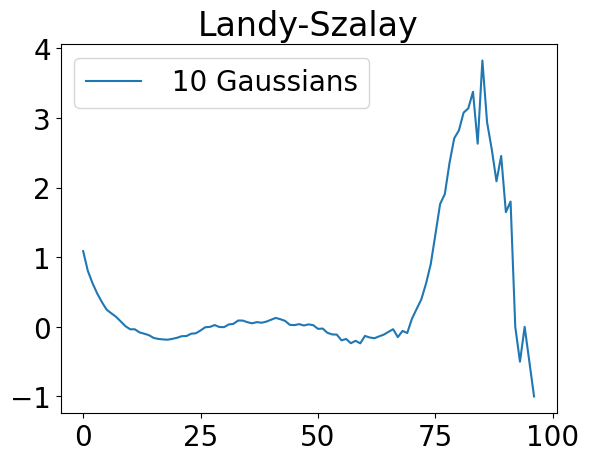

In [48]:
print(time.time()-timer)

times_array.append(time.time()-timer)
plt.plot(np.ma.masked_invalid(corr), label = " 10 Gaussians")
"""
#hist(corr)
#bins = np.linspace(0, a, b)
corr = two_point(uniform_points_disk , bins,method = 'landy-szalay')
#import matplotlib.pyplot as plt
plt.plot(corr, label = "Disk (diameter hundred)")
#hist(corr)

bins = np.linspace(0, a, b)
corr = two_point(uniform_points_square , bins, method  = 'landy-szalay')
import matplotlib.pyplot as plt
plt.plot(corr, label = "Square (100 by 100)")
#dist.plot_autocorrelation_2d(bins, corr,title = "Correlation")
#hist(corr)
"""
#plt.title("Landy-Szalay")
#plt.legend()
#plt.show()

## Chi-square distributions

Here I compute the reduced chi-square to quantify the structture in the function

$$\chi^2 = \frac{1}{N} \sum \frac{corr^2}{\sigma ^2}$$


In [66]:



structure.append(reduced_chi_square(observed =corr ,errors = dcorr))

16.59620108863754

## Experiment 1: How does this scale with datapoints?

In [84]:

data = {'Time stamp': times_array,
        'Numper of points per gaussian': number_points,
        'Structure_index':structure
      }


df = pd.DataFrame(data)

title = "Parameters of the Gaussians are: dimensions = 2 mean_range = (0 -100) cov_range = (-10 -  10) num_samples = 10 "

# Write to CSV with a title
with open('time_complexity.csv', 'w') as f:
    f.write(title + '\n')  # Add the title
    df.to_csv(f, index=False)  # Write DataFrame to CSV without index

ValueError: All arrays must be of the same length

In [78]:
pd.read_csv('time_complexity.csv')

,Parameters of the Gaussians are: dimensions = 2 mean_range = (0 -100) cov_range = (-10 - 10) num_samples = 10
Time stamp,Numper of points per gaussian
0,0
